In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv('User_Data.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
df.shape

(400, 5)

In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
x=df.iloc[:,[2,3]]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#x_train,x_test,y_train,y_test

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [11]:
ss=StandardScaler()
ss

StandardScaler()

In [12]:
x_train=ss.fit_transform(x_train)
x_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [13]:
x_test=ss.transform(x_test)
x_test

array([[-7.98950822e-01,  4.94607583e-01],
       [-2.12648508e-02, -5.77359062e-01],
       [-3.12897090e-01,  1.46942725e-01],
       [-7.98950822e-01,  2.62831011e-01],
       [-3.12897090e-01, -5.77359062e-01],
       [-1.09058306e+00, -1.44652121e+00],
       [-7.01740076e-01, -1.59138156e+00],
       [-2.15686344e-01,  2.14601566e+00],
       [-1.96547978e+00, -5.58617754e-02],
       [ 8.53631867e-01, -7.80163563e-01],
       [-7.98950822e-01, -6.06331134e-01],
       [-9.93372315e-01, -4.32498705e-01],
       [-1.18475597e-01, -4.32498705e-01],
       [ 7.59458956e-02,  2.04886868e-01],
       [-1.77105829e+00,  4.65635512e-01],
       [-6.04529329e-01,  1.36376973e+00],
       [-1.18475597e-01,  2.04886868e-01],
       [-1.86826903e+00,  4.36663440e-01],
       [ 1.63131784e+00,  1.74040666e+00],
       [-3.12897090e-01, -1.38857706e+00],
       [-3.12897090e-01, -6.64275277e-01],
       [ 8.53631867e-01,  2.14601566e+00],
       [ 2.70367388e-01, -5.48386991e-01],
       [ 8.

In [14]:
classifier=SVC(kernel='linear')
classifier

SVC(kernel='linear')

In [15]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [16]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [17]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

In [18]:
print('accuracy of the model:',accuracy_score(y_test,y_pred)*100)

accuracy of the model: 91.25


In [19]:
print('classification report:',classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       0.90      0.98      0.94        58
           1       0.94      0.73      0.82        22

    accuracy                           0.91        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.91      0.91        80



In [20]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[57,  1],
       [ 6, 16]], dtype=int64)

<Axes: >

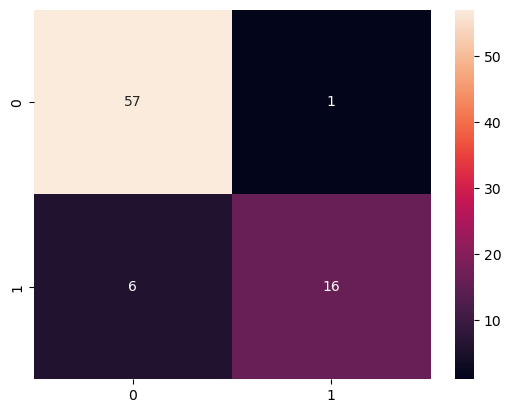

In [21]:
sns.heatmap(cm,annot=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2508\2446104783.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


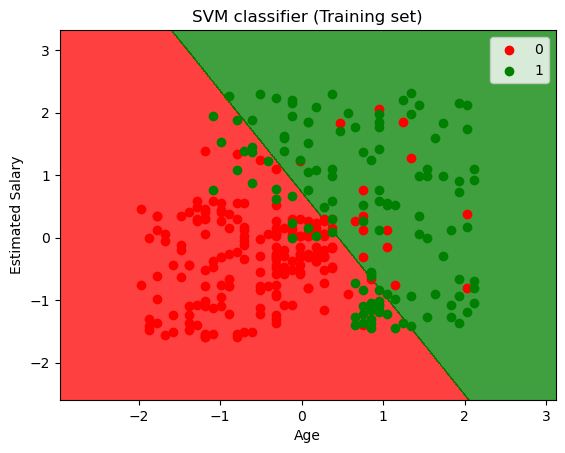

In [22]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red', 'green')))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('SVM classifier (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

C:\Users\user\AppData\Local\Temp\ipykernel_2508\228686308.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


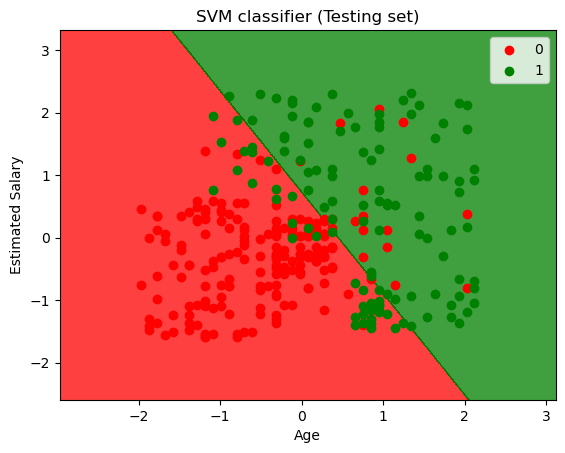

In [23]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red', 'green')))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('SVM classifier (Testing set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  